In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# %%
# %load_ext autoreload
# %autoreload 2

# %%
from pathlib import Path
import matplotlib.pyplot as plt
import os

# %%
PROJECT_CODE = "T008-unet"
FILE_SIZE = 35
FINE_TUNE_EPOCHS = 1
NUM_SAMPLES = 100
FIT_ONE_CYCLE_EPOCHS = 1
MODEL = "mobilenet_v3_small"
LOSS = None

params = {
    "PROJECT_CODE": PROJECT_CODE,
    "FILE_SIZE": FILE_SIZE,
    "FINE_TUNE_EPOCHS": FINE_TUNE_EPOCHS,
}


TFMS = {
    "do_flip": True,
    "flip_vert": True,
    "max_rotate": 360,
    "max_zoom": 1.4,
    "max_lighting": 0.4,
    "max_warp": 0.2,
}

DS = Path("../../datasets/")
T004_DIR = DS / "T004-taco-crops"
T005_DIR = DS / "T005-with-taco-and-ddg"
T008_DIR = DS / "T008-unet"
EXP_BASE = T008_DIR / PROJECT_CODE
OUTS = EXP_BASE / "synth"
LOG_BASE = EXP_BASE / "log"
TACO_BASE_DIR = Path("/Users/hariomnarang/Desktop/personal/TACO/data/")
DDG_BASE_DIR = DS / "T006-ddg-garbage"
ANN_FILE = TACO_BASE_DIR / "annotations.json"
TEST_BIG_IMG = T004_DIR / "14325.jpeg"

LOG_BASE.mkdir(parents=True, exist_ok=True)
DS.exists(), TACO_BASE_DIR.exists(), ANN_FILE.exists()

# %% [markdown]
# # Generate Data

# %%
# generate data first

# from mtrain.smallnet import extract_all_taco, dump_ddg_images

# # %%
# extract_all_taco(
#     images_root=TACO_BASE_DIR,
#     ann_file=ANN_FILE,
#     out_dir=OUTS,
#     box_size=FILE_SIZE,
#     total_samples=NUM_SAMPLES,
#     empty_samples_ratio=1,
# )
# dump_ddg_images(
#     ddg_base_dir=DDG_BASE_DIR,
#     out_pos_dir=OUTS / "pos",
#     box_size=FILE_SIZE,
#     max_samples=NUM_SAMPLES,
# )


(True, True, True)

In [1]:
from mtrain.smallnet.unet.train import get_dls, get_learner

In [ ]:
from fastai.vision.all import resnet18
Path("./hello").mkdir()
dls = get_dls(1, "./hello", 50, T008_DIR / "seg_outs" / "images",T008_DIR / "seg_outs" / "masks" )
learner = get_learner(dls, resnet18)

In [15]:
learner.fine_tune(1)

[0, 0.6432406902313232, 0.6164442300796509, '00:16']
[0, 0.42942750453948975, 0.38874295353889465, '00:19']


In [17]:
from mtrain.smallnet.unet.extract import generate_dataset
from pycocotools.coco import COCO


# prepare_taco_for_fastai_segmentation(COCO(ANN_FILE), TACO_BASE_DIR, T008_DIR / "seg_outs", num_samples=10)
generate_dataset(ANN_FILE, TACO_BASE_DIR, T008_DIR / "seg_outs", 50, num_samples=100)


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


 38%|███▊      | 38/100 [00:03<00:06,  9.99it/s]


KeyboardInterrupt: 

In [28]:
from fastai.vision.all import *

In [37]:
path = untar_data(URLs.CAMVID_TINY)

<div><progress max="2314212" value="2318336"></progress> 100.18% [2318336/2314212 00:01&lt;00:00]</div>

In [41]:
! cat /Users/hariomnarang/.fastai/data/camvid_tiny/codes.txt

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence
LaneMkgsDriv
LaneMkgsNonDriv
Misc_Text
MotorcycleScooter
OtherMoving
ParkingBlock
Pedestrian
Road
RoadShoulder
Sidewalk
SignSymbol
Sky
SUVPickupTruck
TrafficCone
TrafficLight
Train
Tree
Truck_Bus
Tunnel
VegetationMisc
Void
Wall


In [39]:
path/'codes.txt'

Path('/Users/hariomnarang/.fastai/data/camvid_tiny/codes.txt')

In [49]:
img = Image.open("../../datasets/T008-unet/seg_outs/masks/ocq9qq.png").convert("RGB")

In [52]:
img_array = np.array(img)
img_array.shape

(50, 50, 3)

In [55]:
np.unique(img_array)

array([0, 1], dtype=uint8)

In [ ]:
np.array(["background", "trash"])

array(['background', 'trash'], dtype='<U10')

In [56]:
np.loadtxt(path/'codes.txt', dtype=str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [58]:
images = T008_DIR / "seg_outs" / "images"
masks = T008_DIR / "seg_outs" / "masks"
print("exists", images.exists(), masks.exists())

dls = SegmentationDataLoaders.from_label_func(
    images, bs=1, fnames=get_image_files(images), label_func=lambda o: masks / o.name, codes=np.array(["background", "trash"])
)

exists True True


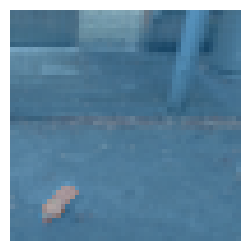

In [60]:
dls.show_batch()

In [64]:
from fastai.callback.progress import CSVLogger, Recorder, ProgressCallback

learn = unet_learner(dls, mobilenet_v3_large)
learn.remove_cb(ProgressCallback)
learn.add_cb(CSVLogger)

/Users/hariomnarang/Desktop/personal/roads/mtrain/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hariomnarang/Desktop/personal/roads/mtrain/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from mtrain.smallnet.unet.extract import generate_dataset
gener

In [65]:
learn.fine_tune(8)

[0, 0.5997064709663391, 0.6561548709869385, '01:04']
[0, 0.46026068925857544, 0.4550400972366333, '01:11']
[1, 0.4401845335960388, 0.5466819405555725, '01:02']
[2, 0.38759854435920715, 0.4409835636615753, '00:56']
[3, 0.4137495756149292, 0.4516543447971344, '00:56']
[4, 0.3419402241706848, 0.5103511214256287, '00:54']
[5, 0.2571575343608856, 0.5059165358543396, '00:58']
[6, 0.19231131672859192, 0.5048190355300903, '01:28']
[7, 0.17157690227031708, 0.4975120723247528, '01:13']


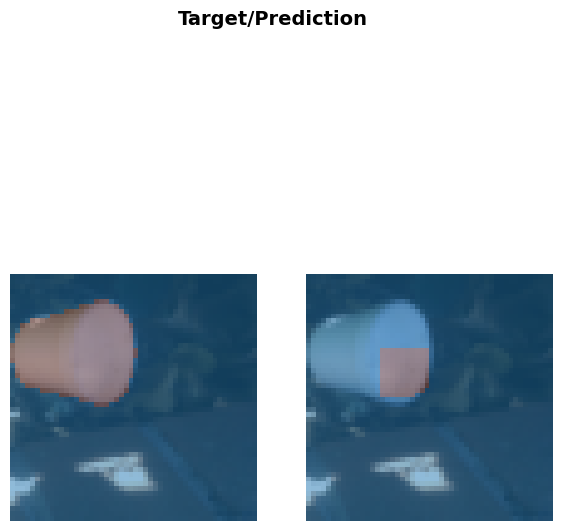

In [66]:
learn.show_results(max_n=6, figsize=(7,8))


In [9]:
coco = COCO(ANN_FILE)

imgs = coco.loadImgs(coco.getImgIds())

imgs = imgs[:1]


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [10]:
imgs

[{'id': 0,
  'width': 1537,
  'height': 2049,
  'file_name': 'batch_1/000006.jpg',
  'license': None,
  'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png',
  'coco_url': None,
  'date_captured': None,
  'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}]

In [11]:
from PIL import Image
import numpy as np

img_info = imgs[0]

img_id = img_info["id"]
img_filename = img_info["file_name"]

# Load image
img_path = os.path.join(TACO_BASE_DIR, img_filename)
img = Image.open(img_path).convert("RGB")

# Resize image
img_resized = img.resize((256,256), Image.BILINEAR)

# Create mask
original_size = img.size
mask = np.zeros((original_size[1], original_size[0]), dtype=np.uint8)


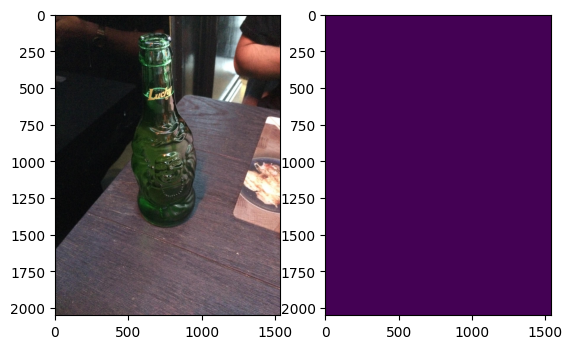

In [15]:
_, ax = plt.subplots(1, 2)
ax[0].imshow(np.asarray(img))
ax[1].imshow(mask)
plt.show()

In [ ]:
# Get annotations for this image
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)

# # Draw segmentation masks
for ann in anns:
    if "segmentation" in ann:
        if type(ann["segmentation"]) is list:
            # Polygon format
            for seg in ann["segmentation"]:
                poly = np.array(seg).reshape(-1, 2)
                from PIL import ImageDraw

                mask_img = Image.fromarray(mask)
                draw = ImageDraw.Draw(mask_img)
                draw.polygon([tuple(p) for p in poly], fill=1)
                mask = np.array(mask_img)

# # Save
# img_name = Path(img_filename).stem
# img_resized.save(images_dir / f"{img_name}.png")
# mask_resized.save(masks_dir / f"{img_name}_mask.png")

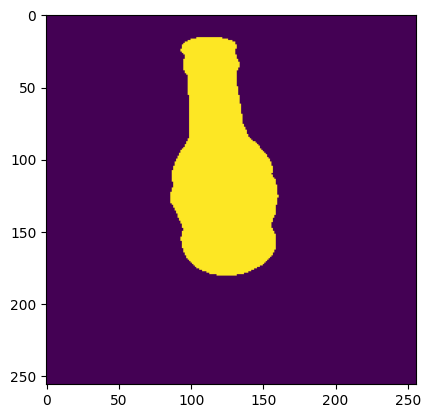

In [21]:
mask_img = Image.fromarray(mask)
mask_resized = mask_img.resize((256,256), Image.NEAREST)
plt.imshow(np.asarray(mask_resized))

In [22]:
mask_resized.save("./mask.png")

In [23]:
def generate_random_crops_with_masks(coco, dataset_path, img_info, crop_size, max_padding, num_crops=5):
    """
    Generate random crops of image containing garbage along with corresponding masks.
    
    Args:
        coco: COCO object
        dataset_path: Path to TACO images
        img_info: Image info dict from COCO
        crop_size: Size of crops (width, height) or single int for square
        max_padding: Maximum padding around bounding box
        num_crops: Number of random crops to generate per image
        
    Returns:
        List of tuples: (crop_array, mask_array, crop_bbox)
        where crop_bbox is [x, y, w, h] of the crop in original image
    """
    import os
    import numpy as np
    from PIL import Image, ImageDraw
    import random
    
    if isinstance(crop_size, int):
        crop_w, crop_h = crop_size, crop_size
    else:
        crop_w, crop_h = crop_size
    
    img_id = img_info['id']
    img_filename = img_info['file_name']
    
    # Load image
    img_path = os.path.join(dataset_path, img_filename)
    img = Image.open(img_path).convert('RGB')
    img_array = np.array(img)
    img_height, img_width = img_array.shape[:2]
    
    # Get annotations
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    
    if len(anns) == 0:
        return []
    
    # Create full mask for the image
    full_mask = np.zeros((img_height, img_width), dtype=np.uint8)
    
    for ann in anns:
        if 'segmentation' in ann:
            for seg in ann['segmentation']:
                poly = np.array(seg).reshape(-1, 2)
                mask_img = Image.fromarray(full_mask)
                draw = ImageDraw.Draw(mask_img)
                draw.polygon([tuple(p) for p in poly], fill=1)
                full_mask = np.array(mask_img)
    
    # Generate random crops
    crops_data = []
    
    for _ in range(num_crops):
        # Pick a random annotation to center the crop around
        ann = random.choice(anns)
        x, y, w, h = ann['bbox']
        
        # Random padding on each side
        pad_left = random.randint(0, max_padding)
        pad_right = random.randint(0, max_padding)
        pad_top = random.randint(0, max_padding)
        pad_bottom = random.randint(0, max_padding)
        
        # Calculate crop boundaries
        crop_x1 = max(0, int(x - pad_left))
        crop_y1 = max(0, int(y - pad_top))
        crop_x2 = min(img_width, int(x + w + pad_right))
        crop_y2 = min(img_height, int(y + h + pad_bottom))
        
        # Ensure minimum crop size
        if crop_x2 - crop_x1 < crop_w:
            crop_x2 = min(img_width, crop_x1 + crop_w)
        if crop_y2 - crop_y1 < crop_h:
            crop_y2 = min(img_height, crop_y1 + crop_h)
        
        # Crop image and mask
        crop_img = img_array[crop_y1:crop_y2, crop_x1:crop_x2]
        crop_mask = full_mask[crop_y1:crop_y2, crop_x1:crop_x2]
        
        # Resize to target crop size
        crop_img_pil = Image.fromarray(crop_img)
        crop_mask_pil = Image.fromarray(crop_mask)
        
        crop_img_resized = crop_img_pil.resize((crop_w, crop_h), Image.BILINEAR)
        crop_mask_resized = crop_mask_pil.resize((crop_w, crop_h), Image.NEAREST)
        
        crop_img_array = np.array(crop_img_resized)
        crop_mask_array = np.array(crop_mask_resized)
        
        crop_bbox = [crop_x1, crop_y1, crop_x2 - crop_x1, crop_y2 - crop_y1]
        
        crops_data.append((crop_img_array, crop_mask_array, crop_bbox))
    
    return crops_data


{'id': 0,
 'width': 1537,
 'height': 2049,
 'file_name': 'batch_1/000006.jpg',
 'license': None,
 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png',
 'coco_url': None,
 'date_captured': None,
 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}

In [40]:
# Get image info
# img_id = 123  # your image id
# img_info = coco.loadImgs(img_id)[0]

# Generate crops
crops = generate_random_crops_with_masks(
    coco=coco,
    dataset_path=TACO_BASE_DIR,
    img_info=img_info,
    crop_size=256,  # or (256, 256)
    max_padding=1000,
    num_crops=1,
)

# Access results
i, m, bb = crops[0]

In [41]:
from mtrain.smallnet.tfms import PaddedResize

resizer = PaddedResize(40)

In [42]:
i = resizer(i)
m = resizer(m)

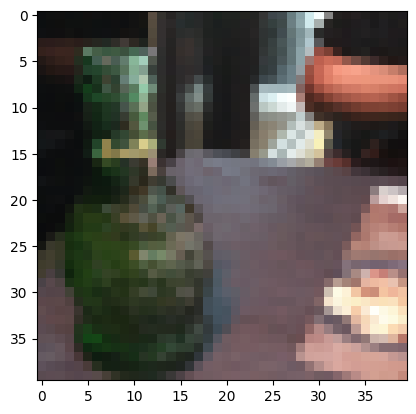

In [43]:
plt.imshow(i)

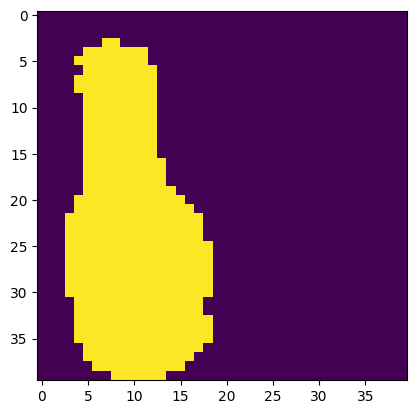

In [44]:
plt.imshow(m)

In [17]:
anns

[{'id': 1,
  'image_id': 0,
  'category_id': 6,
  'segmentation': [[561.0,
    1238.0,
    568.0,
    1201.0,
    567.0,
    1175.0,
    549.0,
    1127.0,
    538.0,
    1089.0,
    519.0,
    1043.0,
    517.0,
    1005.0,
    523.0,
    964.0,
    529.0,
    945.0,
    520.0,
    896.0,
    525.0,
    862.0,
    536.0,
    821.0,
    554.0,
    769.0,
    577.0,
    727.0,
    595.0,
    678.0,
    596.0,
    585.0,
    588.0,
    346.0,
    581.0,
    328.0,
    569.0,
    306.0,
    570.0,
    276.0,
    576.0,
    224.0,
    560.0,
    205.0,
    564.0,
    170.0,
    578.0,
    154.0,
    608.0,
    136.0,
    649.0,
    127.0,
    688.0,
    127.0,
    726.0,
    129.0,
    759.0,
    141.0,
    784.0,
    153.0,
    792.0,
    177.0,
    788.0,
    193.0,
    782.0,
    209.0,
    792.0,
    238.0,
    802.0,
    271.0,
    802.0,
    294.0,
    791.0,
    319.0,
    789.0,
    360.0,
    794.0,
    395.0,
    810.0,
    529.0,
    819.0,
    609.0,
    841.0,
    675.0,
    8

In [3]:
from fastai.vision.all import *

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)